In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

from pymystem3 import Mystem

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



/home/ivanc/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

def Lemmatize(src: list):
    ''' Лемматизирует переданный датасет
    '''
    text_nomalized = ' '.join(src).lower() 

    m = Mystem()
    lemmas = m.lemmatize(text_nomalized)
    
    return lemmas

In [3]:
data = pd.read_csv('dataframe.csv')
print(data)
#data = data.head(10)
#«Обучающая выборка» — это набор данных, который используется для разработки модели машинного обучения.

#«Валидационная выборка» — это набор данных, который используется в процессе разработки модели машинного обучения для подбора оптимального набора гиперпараметров.

#«Тестовая выборка» — это набор данных, который не используется непосредственно в процессе обучения модели или для подбора гиперпараметров, 
# однако позволяет протестировать модель и является контрольным.

      mark                                    text_of_comment
0        1  Сразу отвечаю на вопрос, почему я решила прочи...
1        1  Эта сказка хоть и сказка,но учит всех людей то...
2        1  Несомненно видно мастерство автора, который с ...
3        1  Эта сказка хоть и сказка,но учит всех людей то...
4        1  Несомненно видно мастерство автора, который с ...
...    ...                                                ...
5015     5  Мне кажется что эту книгу должен прочитать каж...
5016     5  Сильно, мощно и талантливо. И глубоко, если см...
5017     5  Ощущение, будто посмотрела фильм ужасов. Реаль...
5018     5  Дом станционного смотрителя в одноименной пове...
5019     5  17 век. Англия.В стране процветает охота на ве...

[5020 rows x 2 columns]


In [4]:
data.dropna(inplace=True)
remove_non_alphabets = lambda x: re.sub(r'[^а-яА-Я]',' ',str(x))

tokenize = lambda x: word_tokenize(x, language = "russian")

ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]

print('remove_non_alphabets')
data['text_of_comment'] = data['text_of_comment'].apply(remove_non_alphabets)

print('tokenize')
data['text_of_comment'] = data['text_of_comment'].apply(tokenize) # [ word_tokenize(row) for row in data['email']]

print('stem')
data['text_of_comment'] = data['text_of_comment'].apply(stem)

print('Lemmatize')
c = 0
for words_list in data['text_of_comment']:
    words_list = Lemmatize(words_list)
    print(c)
    c+=1

print('complete')
data['text_of_comment'] = data['text_of_comment'].apply(lambda x: ' '.join(x))

data.dropna(inplace=True)

print(data)


remove_non_alphabets
tokenize
stem
Lemmatize
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
2

In [54]:
data.loc[(data["mark"] < 3), "mark"] = 0
data.loc[(data["mark"] >= 3), "mark"] = 1
print(data)

AttributeError: 'DataLoader' object has no attribute 'loc'

In [55]:
stopWords = stopwords.words('russian')

max_words = 10000

vectorizer = CountVectorizer(max_features=max_words, stop_words=stopWords)
sparse_matrix = vectorizer.fit_transform(data['text_of_comment']).toarray()
print(sparse_matrix)
sparse_matrix.shape

TypeError: 'DataLoader' object is not subscriptable

In [56]:
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(data['mark']), test_size = 0.1, train_size = 0.8)

TypeError: 'DataLoader' object is not subscriptable

In [46]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.labels = [0, 1]
        self.linear1 = nn.Linear(10000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        x = F.sigmoid(x)
        return x


In [126]:
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
print(x_train, y_train)

TypeError: expected np.ndarray (got Tensor)

In [13]:
# plt.plot(loss_values)
# plt.title('Loss Value vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Loss'])
# plt.show()

In [14]:
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [15]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))


Accuracy : 39.0438232421875%


In [166]:
#from tqdm import trange

def expirement(lr, batch_size):
    model = LogisticRegression()
    criterion = nn.BCELoss()
    
    data = torch.utils.data.DataLoader(x_train, batch_size = batch_size)
    optimizer = torch.optim.Adam(params=model.parameters() , lr = lr)
    epochs = 10
    model.train()
    loss_values = []
    for epoch in range(epochs):
        for elems in data: 
            #optimizer.zero_grad()
            y_pred = model(x_train)
            print(y_pred[batch_size], y_train[batch_size].resize(1).to(dtype=float))
            loss = criterion(y_pred, y_train)
            loss_values.append(loss.item())
            pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
            acc = pred * 100.0 / len(x_train)
            print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
            loss.backward()
            optimizer.step()
    plt.plot(loss_values)
    plt.title('Таблица эпох и потерь при lr='+str(lr) +" batch_size="+str(batch_size))
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend(['Потери'])
    plt.show()
    
lr_list=[0.0001,0.0002,0.0003]
batch_size=[1000,500,100]

for LR in lr_list:
        for BZ in batch_size:
            expirement(LR,BZ)

tensor([0.4659], dtype=torch.float64, grad_fn=<ToCopyBackward0>) tensor([0.], dtype=torch.float64)


ValueError: Using a target size (torch.Size([4013])) that is different to the input size (torch.Size([4013, 1])) is deprecated. Please ensure they have the same size.

loss:0.1713776429538909
accuracy:30.0
lr:0.0003; bs:10


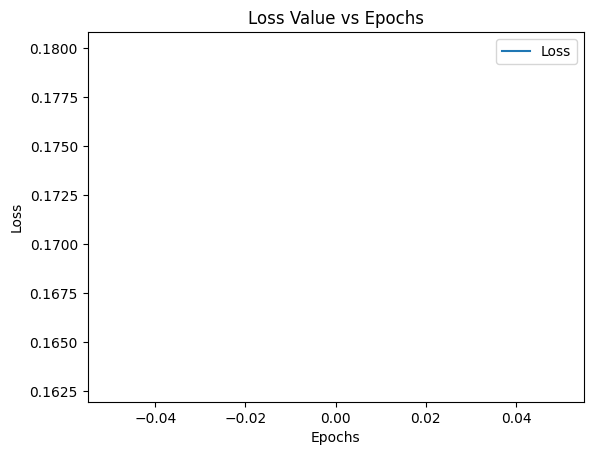

loss:0.0043981480574367795
accuracy:0.0
lr:0.0013; bs:500


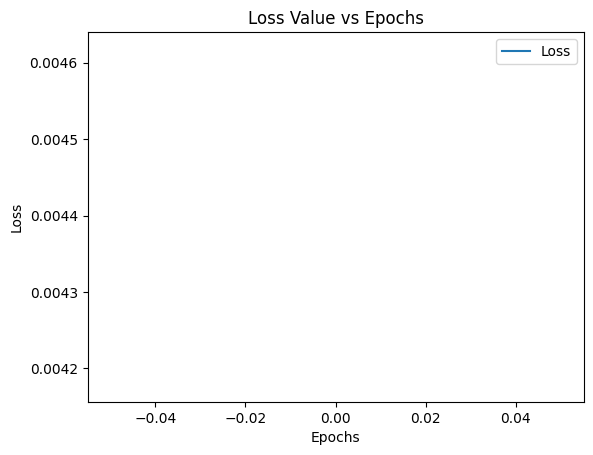

loss:0.018310790575997302
accuracy:3.0
lr:0.0023; bs:100


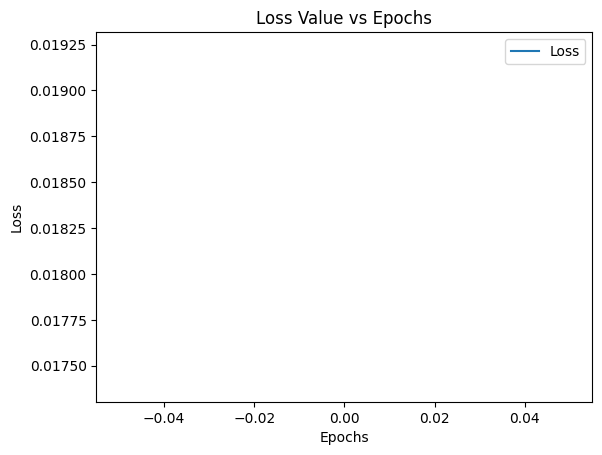

In [154]:
# from tqdm import trange
# loss_values = list()
# batch_size=[10,500,100]

# for j in range(3):
#     model = LogisticRegression()    
#     optimizer = torch.optim.Adam(params=model.parameters() , lr=0.0003+(j/1000))
#     batch_idx = batch_size[j]
#     criterion = nn.BCELoss()
#     loss_values = list()
#     acc_values = list()
#     loss_epoch = 0
#     tmp = 0

#     for epoch in range(3):
        
#         #for i in range(3):
#         optimizer.zero_grad()
#         y_pred = model(x_train[batch_idx, :])
#         #print(y_pred.shape)
#         loss = criterion(y_pred.to(dtype=float), y_train[batch_idx].resize(1).to(dtype=float))
#         #pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
#         if(float(y_pred.item()) < 0.5):
#             tmp+=1
#         #acc = pred * 100.0 / x_train.shape[0]
#         loss.backward() #вычисляет градиент ошибки
#         optimizer.step()
#         loss_epoch += loss.item()
#     acc = tmp/batch_idx * 100
#     loss_value = loss_epoch/batch_idx
#     loss_values.append(loss_value)
#     print(f'loss:{loss_value}\naccuracy:{acc}')
        
#     #loss_values.append(loss_value)
#     print(f"lr:{0.0003+(j/1000)}; bs:{batch_idx}")
#     plt.plot(loss_values)
#     plt.title('Loss Value vs Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend(['Loss'])
#     plt.show()